# 1. Introduction  
### Describe PE2  
PE2 courses use programming to address practical issues in engineering. Through this, we aim to master the ability to solve automation, data analysis, and modeling problems addressed in the industrial field.  

### Describe your team members and roles for each members  

![재혁](https://media.discordapp.net/attachments/848924937712435253/848925361429020692/1.jpg)

Park Jae Hyuk  
- Leader of the team
- Provides overall direction for the project
- Modified the details of the coding of the team members.
- Giving feedback on coding to team members  

![태현](https://media.discordapp.net/attachments/848924937712435253/848925364272758845/2.png)

Noh Tae-hyun  
- Shared materials to help with coding  
- Create presentation materials  
- Partially coding for each module 

![혜란](https://media.discordapp.net/attachments/848924937712435253/848925359298445332/4.jpg)

Lee Hye-ran  
- Share usage of specific libraries  
- Partially coding for each module  
- Presenting and creating the overall flow of presentation materials  

---

# 2. Object of project
### Explain object of project
First all, this project is intended to create modules for large amounts of data to understand information about the data. We tried to analyze the modulation performance of the modulator easily. When a client provides data to a developer, the developer creates software for the data received from the client.  

![picture](https://cdn.discordapp.com/attachments/851355322635386880/853507287985553470/unknown.png)  

---

# 3. Structure of code
### Explain your code


#### 1) src_directory.py  
-  If there is no folder to save the results, create a folder.

```
import os

def create_folder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print('Error: Creating directory. ' + directory)
```

#### 2) src_extract.py  
- A file that extracts information from a given xml data, which can be stored in place of a file in csv format.
- Essential libraries in this file are Pandas, Etree and Os.

```
import pandas
import xml.etree.ElementTree as ET
from dateutil.parser import parse
import os
from . import graph
from . import path
from . import directory
```
```
    data = []
    values = []
```
```
    TestSiteInfo = root.find('TestSiteInfo').attrib
    values.append(TestSiteInfo['Batch'])
```
```
    # script needs additional information.
    data.append(values)
    df = pandas.DataFrame(data, columns=columns).set_index("Lot")
    save_route = path.path() + '/result/csv_{}'.format(time)
    directory.create_folder(save_route)
    if not os.path.exists(save_route + '/analyzed.csv'):
        df.to_csv(save_route + '/analyzed.csv', mode='w')
    else:
        df.to_csv(save_route + '/analyzed.csv', mode='a', header=False)
```

#### 3) src_graph.py  
- Using ployfit and lmfit, obtain the polynomial closest to the given data and represent it as a graph. 
- run.py has defined a function for the option to be specified.
```
from lmfit import Parameters, fit_report, minimize, Model
```
```
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    results['polynomial'] = coeffs.tolist()
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['determination'] = ssreg / sstot
    return results
 ```   
 ```   
if show is True:
    plt.show(block=False)
    plt.pause(3)   
if save is True:
    save_path = path.path() + '/result/graph_{}/lot'.format(time) + sub_path
    directory.create_folder(save_path)
    plt.savefig(save_path + '/' + image_path[-1][:-4] + '.png')
    plt.close()
```

#### 4) src_path.py  
- Returns the path of run.py.


```
import os

def path():
    p = '/'.join(os.getcwd().split("\\"))
    return p
```

#### 5) src_process.py  
- Depending on the options specified in run.py, select specific properties (wafer, coordinate) from the data to run the extract, graph, and wtw modules. 
- The required libraries are glob and tqdm, and glob uses the path name of the file to output only certain files. 
- tqdm visualizes progress.
```
import glob
from glob import glob
from tqdm import tqdm
```
```
def work(wafer, coordinate, save, show, csv, data_path):
    file = []
    if data_path == '':
        if wafer == 'All' and coordinate == 'All':
            file = glob(path.path() + '/data/**/*LMZ*.xml', recursive=True)
        elif coordinate == 'All':
            file = glob(path.path() + '/data/**/{}/**/*LMZ*.xml'.format(wafer), recursive=True)
        else:
            file = glob(path.path() + '/data/**/{}/**/*{}*LMZ*.xml'.format(wafer, coordinate), recursive=True)
    else:
        if wafer == 'All' and coordinate == 'All':
            file = glob(data_path + '/**/*LMZ*.xml', recursive=True)
        elif coordinate == 'All':
            file = glob(data_path + '/**/{}/**/*LMZ*.xml'.format(wafer), recursive=True)
        else:
            file = glob(data_path + '/**/{}/**/*{}*LMZ*.xml'.format(wafer, coordinate), recursive=True)
```

#### 6) src_gui.py  
- User interface coding for easy usage when running in run.py, the checkbox is displayed. 
- In the check box, you can select wafers or coordinates, save or show images, and whether open or close the results folder. 
- If the data you want to analyze is in an external path, you can load the folder. 
- Pass the entered option to the process module.
```
    def btnInput_clicked(self):
        wafer = self.waferEdit.text()
        column = self.columnEdit.text()
        save = self.saveEdit.isChecked()
        show = self.showEdit.isChecked()
        csv = self.csvEdit.isChecked()
        data = self.label3.text()
        try:
            if wafer == '' or column == '':
                raise ValueError('There is blank')
            else:
                process.work(wafer, column, save, show, csv, data)
                QMessageBox.information(self, 'Message', str('Done!'))
        except ValueError as e:
            QMessageBox.information(self, 'Error', str(e))
        except:
            QMessageBox.information(self, 'Error', 'Error Unknown')
```

#### 7) src_wfw.py  
- As a result of wafer-to-wafer using csv, the graph can be found by wavelength (1550nm, 1310nm). 
- For example, for wavelengths 1550 nm of D07, the first column is marked in red.  
- It only runs when the csv file is saved.
```
def analyze(time):
    warnings.filterwarnings(action='ignore')
    data = pd.read_csv('./result/csv_{}/analyzed.csv'.format(time))
    y = []
    wafernumber = data['Wafer']
```

#### 8) run.py
- We imported sys, a module that allows direct control of variables and functions provided by Python interpreters. 
- Dialog defined a new class in GUI programming, using a purpose-built dialog class as a window for user interaction. 
- We put wafer and coordinate as options to choose whether to show or save graphs.
```
import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from src import gui
```
```
if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = gui.MainWindow()
    window.show()
    app.exec_()
```

#### 9) .gitignore
- When pushing to github when collaborating with team members, preventing loss of file and data conflict elements with others, backing files unwanted by the project, compiled files, analyzed data files, etc.

#### 10) readme.txt
- Briefly explains how to use the project. 
- A description of the project's purpose, necessary libraries, usage methods, and files is written.

#### 11) requirement.txt
- The library required for the project and its version are specified. 
- Pip install -r requirements.txt. allows you to install necessary libraries at once.

---

# 4. Example of analysis result
### Show a sample image of analysis result  

![analysis result](https://cdn.discordapp.com/attachments/851355322635386880/853246353731485696/unknown.png)

### Show a table in csv file

![csv file](https://cdn.discordapp.com/attachments/851355322635386880/853281943047372850/unknown.png)  

---

# 5. Result of wafer-to-wafer using csv file

- description 1

In [1]:
import pandas as pd
import os
from glob import glob

path = '/'.join(os.getcwd().split("\\")[:-1]) + '/result'
csv = glob(path + '/**/*.csv')[-1]
data = pd.read_csv(csv)
print(data)

        Lot Wafer      Mask  TestSite                  Name  \
0   P184640   D07  GORILLA5  DCM_LMZC  MZMCTE_LULAB_450_500   
1   P184640   D07  GORILLA5  DCM_LMZC  MZMCTE_LULAB_450_500   
2   P184640   D07  GORILLA5  DCM_LMZC  MZMCTE_LULAB_450_500   
3   P184640   D07  GORILLA5  DCM_LMZC  MZMCTE_LULAB_450_500   
4   P184640   D07  GORILLA5  DCM_LMZC  MZMCTE_LULAB_450_500   
..      ...   ...       ...       ...                   ...   
93  P184640   D24  GORILLA5  DCM_LMZO  MZMOTE_LULAB_380_500   
94  P184640   D24  GORILLA5  DCM_LMZO  MZMOTE_LULAB_380_500   
95  P184640   D24  GORILLA5  DCM_LMZO  MZMOTE_LULAB_380_500   
96  P184640   D24  GORILLA5  DCM_LMZO  MZMOTE_LULAB_380_500   
97  P184640   D24  GORILLA5  DCM_LMZO  MZMOTE_LULAB_380_500   

                   Date  Row  Column  ErrorFlag Error description  \
0   2019-07-15 19:15:38   -1      -1          0          No Error   
1   2019-07-15 19:21:45   -1      -3          0          No Error   
2   2019-07-15 20:22:17   -1       3

- description 2

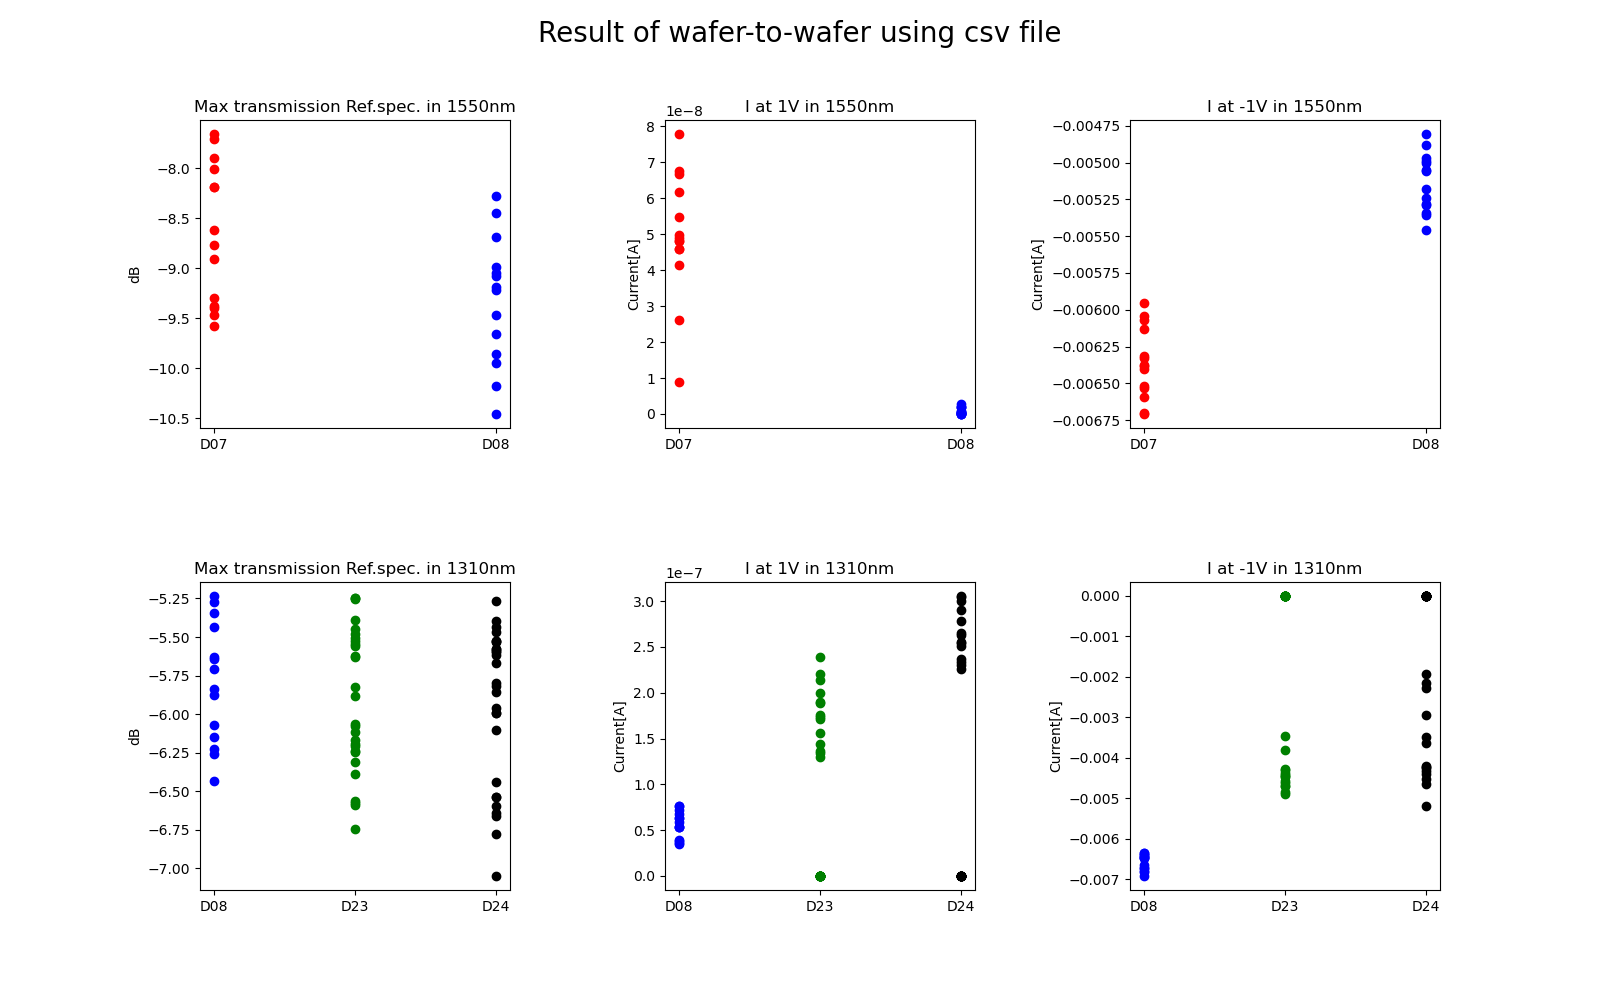

In [5]:
from IPython.display import Image
img = glob(path + '/**/wafer_to_wafer.png')[-1]
Image(img)